# Packages

In [1]:
%matplotlib inline 
import numpy as np
from astropy.io import fits
import csv
import matplotlib.pyplot as plt

# TESS Segment 1 (s0042)

In [2]:
#read in my data
lchdu0 = fits.open('tess2021232031932-s0042-0000000405484574-0213-s_lc.fits')
lcdata0 = lchdu0[1].data

[  168    32    32 ... 16400 16400 16400]


(2450.0, 2470.0)

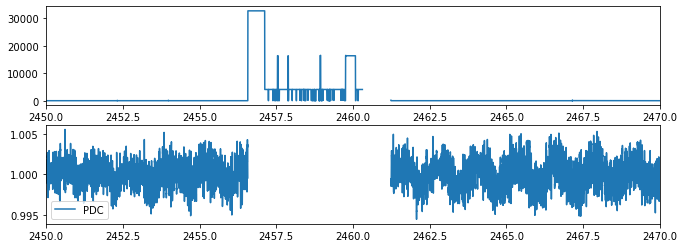

In [3]:
sapflux0 = lcdata0['SAP_FLUX']
pdcflux0 = lcdata0['PDCSAP_FLUX']
quality0 = lcdata0['QUALITY']
time0 = lcdata0['TIME']
pdcfluxerr0 = lcdata0['PDCSAP_FLUX_ERR']
print(quality0)
fig = plt.figure(figsize = (11,4))

# Time vs Quality
fig.add_subplot(211)
plt.plot(time0, quality0)
plt.xlim(2450, 2470)

normFlux0 = pdcflux0 /np.nanmean(pdcflux0)
normErr0 = pdcfluxerr0 /np.nanmean(pdcflux0)

# Time vs Normal Flux
fig.add_subplot(212)
plt.plot(time0, normFlux0, label = 'PDC')
plt.legend(loc = 'lower left')
plt.xlim(2450, 2470)

# TESS Segment 2 (s0043)

In [5]:
#read in my data
lchdu1 = fits.open('tess2021258175143-s0043-0000000405484574-0214-s_lc.fits')
lcdata1 = lchdu1[1].data

[168  32  32 ...  16  16  16]


(2473.0, 2500.0)

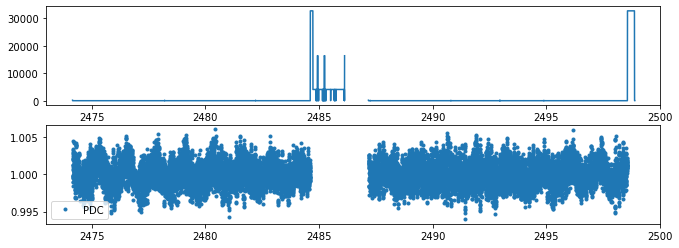

In [6]:
sapflux1 = lcdata1['SAP_FLUX']
pdcflux1 = lcdata1['PDCSAP_FLUX']
quality1 = lcdata1['QUALITY']
time1 = lcdata1['TIME']
pdcfluxerr1 = lcdata1['PDCSAP_FLUX_ERR']
print(quality1)
fig = plt.figure(figsize = (11,4))

# Time vs Quality
fig.add_subplot(211)
plt.plot(time1, quality1)
plt.xlim(2473, 2500)

normFlux1 = pdcflux1 /np.nanmean(pdcflux1)
normErr1 = pdcfluxerr1 /np.nanmean(pdcflux1)

# Time vs Normal Flux
fig.add_subplot(212)
plt.plot(time1, normFlux1,'.', label = 'PDC')
plt.legend(loc = 'lower left')
plt.xlim(2473, 2500)

# TESS Segment 3 (s0044)

In [7]:
#read in my data
lchdu2 = fits.open('tess2021284114741-s0044-0000000405484574-0215-s_lc.fits')
lcdata2 = lchdu2[1].data

[168  32  32 ...   0   0   0]


(2500.0, 2525.0)

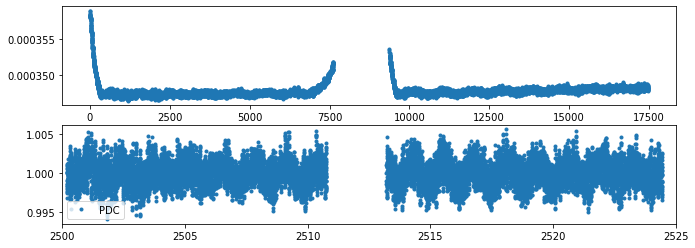

In [8]:
sapflux2 = lcdata2['SAP_FLUX']
pdcflux2 = lcdata2['PDCSAP_FLUX']
quality2 = lcdata2['QUALITY']
time2 = lcdata2['TIME']
pdcfluxerr2 = lcdata2['PDCSAP_FLUX_ERR']
print(quality2)
fig = plt.figure(figsize = (11,4))

# Time vs Quality
fig.add_subplot(211)
plt.plot(time2, quality2)
plt.xlim(2450, 2470)

normFlux2 = pdcflux2 /np.nanmean(pdcflux2)
normErr2 = pdcfluxerr2 /np.nanmean(pdcflux2)

# Time vs Normal Flux
fig.add_subplot(212)
plt.plot(time2, normFlux2,'.', label = 'PDC')
plt.legend(loc = 'lower left')
plt.xlim(2500, 2525)

# Combined Segments 1-3 (s0042-s0044)

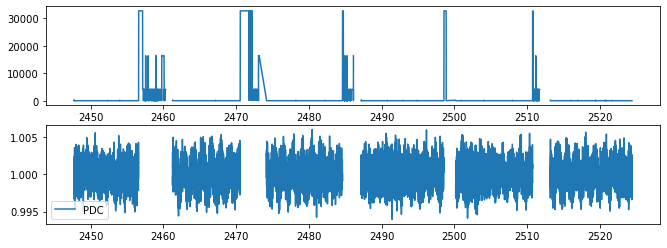

In [9]:
sapflux = np.concatenate((sapflux0, sapflux1, sapflux2))
pdcflux = np.concatenate((pdcflux0, pdcflux1, pdcflux2))
err = np.concatenate((normErr0, normErr1, normErr2))
quality = np.concatenate((quality0, quality1, quality2))
time = np.concatenate((time0, time1, time2))
fig = plt.figure(figsize = (11,4))

# Time vs Quality
fig.add_subplot(211)
plt.plot(time, quality)

normFlux = np.concatenate((normFlux0, normFlux1, normFlux2))

# Time vs Normal Flux
fig.add_subplot(212)
plt.plot(time, normFlux, label = 'PDC')
plt.legend(loc = 'lower left')

# Error Segments 1-3 (s0042-s0044)

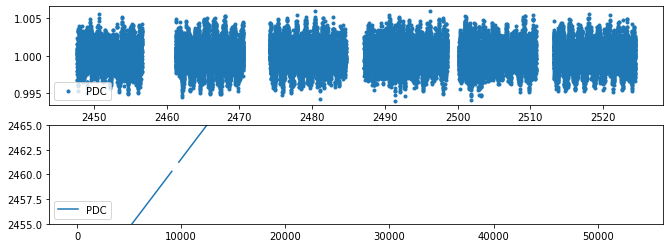

In [10]:
baddata = np.abs(normFlux - 1) > .01
fig = plt.figure(figsize = (11,4))
fig.add_subplot(211)
plt.plot(time[~baddata], normFlux[~baddata],'.', label = 'PDC')
plt.legend(loc = 'lower left')
fig.add_subplot(212)
plt.plot(time[~baddata], label = 'PDC')
plt.ylim(2455, 2465)
plt.legend(loc = 'lower left')

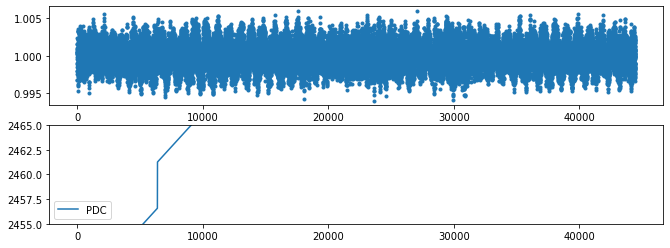

In [11]:
bad_data = np.isnan(normFlux)
fig = plt.figure(figsize = (11,4))
fig.add_subplot(211)
plt.plot(normFlux[~bad_data],'.', label = 'PDC')
fig.add_subplot(212)
plt.plot(time[~bad_data], label = 'PDC')
plt.ylim(2455, 2465)
plt.legend(loc = 'lower left')

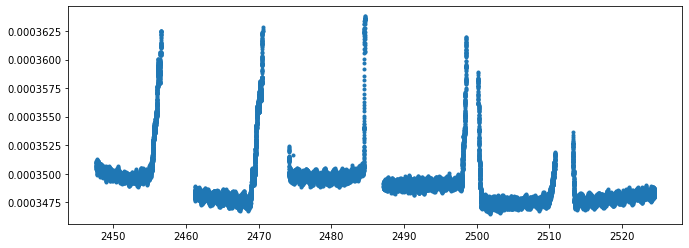

In [12]:
fig = plt.figure(figsize = (11,4))
plt.plot(time[~bad_data], err[~bad_data], '.', label = 'PDC')

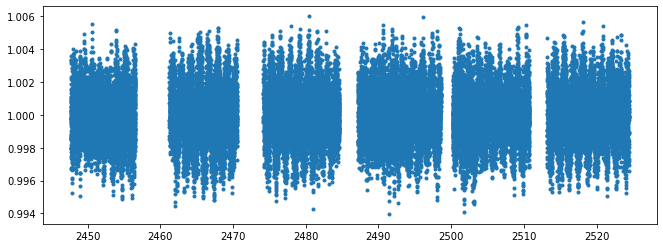

In [13]:
fig = plt.figure(figsize = (11,4))
plt.plot(time[~bad_data], normFlux[~bad_data], '.', label = 'PDC')

# Sanity Check and File Output for GLS

In [14]:
print(len(time[~bad_data]))
print(len(normFlux[~bad_data]))
print(len(err[~bad_data]))
ntime = time[~bad_data]
NnormFlux = normFlux[~bad_data]
nerr = err[~bad_data]

44446
44446
44446


In [15]:
with open("newHD23567_GLSready.csv", 'w') as file:
    writer = csv.writer(file, delimiter=' ')

    for w in range(len(ntime)):
        writer.writerow([ntime[w], NnormFlux[w], nerr[w]])

file.close()